In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

from catboost.datasets import titanic

train_df, test_df = titanic()


In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df.Survived

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [ ]:
X = X.drop('Name', axis=1)
X = X.drop('Ticket', axis=1)
X = X.drop('PassengerId', axis=1)

In [ ]:
cabin_list = X['Cabin'].tolist()
for i, v in enumerate(cabin_list):
  if type(v) == type('str'):
    print(v)
    cabin_list[i] = 1
  else:
    cabin_list[i] = 0
X = X.drop('Cabin', axis=1)
X.insert(1, "Cabin", cabin_list)

In [ ]:
X = X.fillna(-1)
Embarked_list = X['Embarked'].tolist()
X.loc[X["Embarked"] == "Q", "Embarked"] = 1
X.loc[X["Embarked"] == "C", "Embarked"] = 2
X.loc[X["Embarked"] == "S", "Embarked"] = 3
print(set(Embarked_list))

{'Q', 'C', 'S', -1}


In [ ]:
X.loc[X["Sex"] == "male", "Sex"] = 1
X.loc[X["Sex"] == "female", "Sex"] = 0
X

,Pclass,Cabin,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,2
2,3,0,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,3,0,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,3
887,1,1,0,19.0,0,0,30.0000,3
888,3,0,0,-1.0,1,2,23.4500,3
889,1,1,1,26.0,0,0,30.0000,2


In [ ]:
X

,Pclass,Cabin,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,2
2,3,0,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,3,0,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,3
887,1,1,0,19.0,0,0,30.0000,3
888,3,0,0,-1.0,1,2,23.4500,3
889,1,1,1,26.0,0,0,30.0000,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, stratify=y, random_state=42) 
clf = DecisionTreeClassifier(max_depth=4, random_state=0) 
clf = clf.fit(X_train, y_train)

In [ ]:
feature_names = list(X.columns)

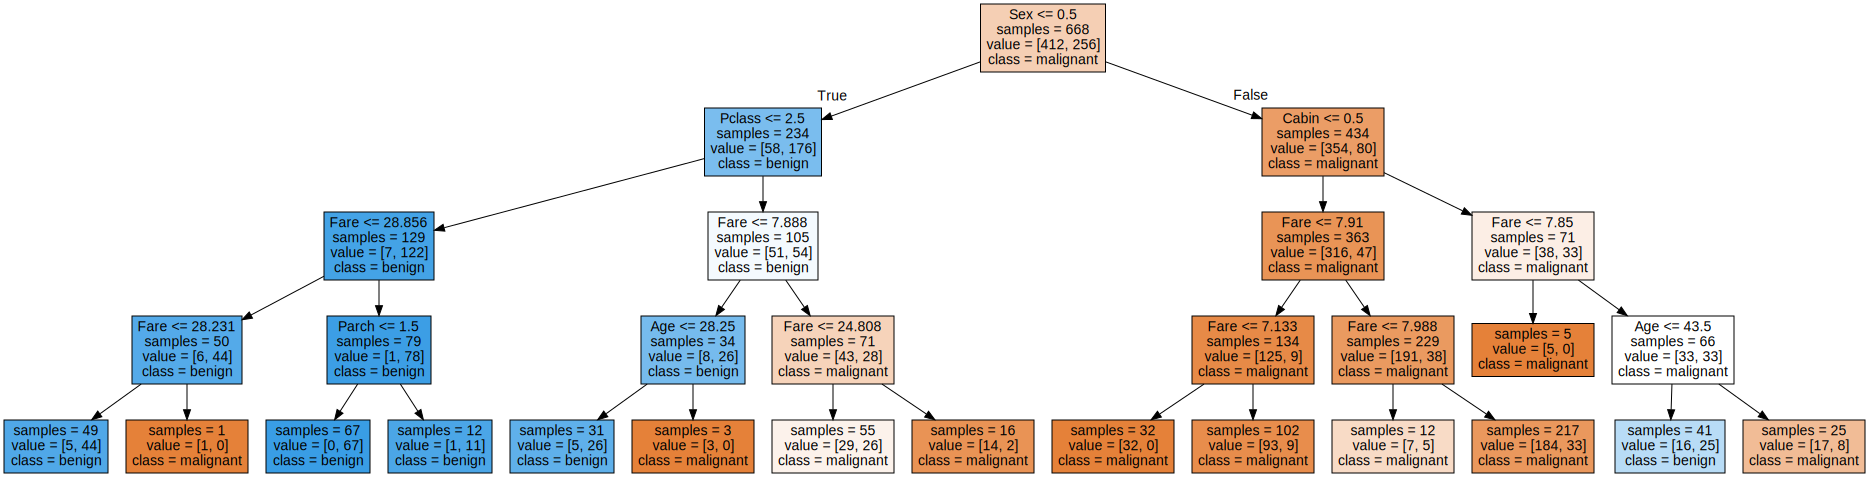

In [ ]:
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=feature_names, impurity=False, filled=True)
import graphviz 
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)

In [ ]:
print("Важности признаков:\n{}".format(clf.feature_importances_)) 

Важности признаков:
[0.13720626 0.08502021 0.62413113 0.04110381 0.         0.00089994
 0.11163865 0.        ]


In [ ]:
for name, score in zip(feature_names, clf.feature_importances_): 
    print(name, score)

Pclass 0.13720625517779694
Cabin 0.08502021210048157
Sex 0.6241311290522034
Age 0.04110380616230101
SibSp 0.0
Parch 0.0008999426383992643
Fare 0.1116386548688179
Embarked 0.0


Text(0, 0.5, 'Признак')

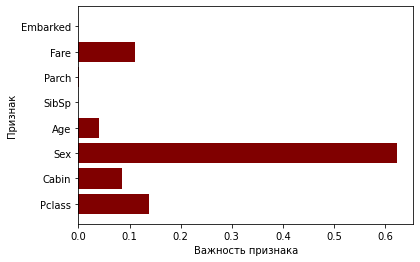

In [ ]:
n_features = {}
for name, score in zip(feature_names, clf.feature_importances_): 
  n_features[name] = score
courses = list(n_features.keys())
values = list(n_features.values())
plt.barh(courses, values, color='maroon')
plt.xlabel("Важность признака") 
plt.ylabel("Признак") 


Голая модель

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, stratify=y, random_state=42) 
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)

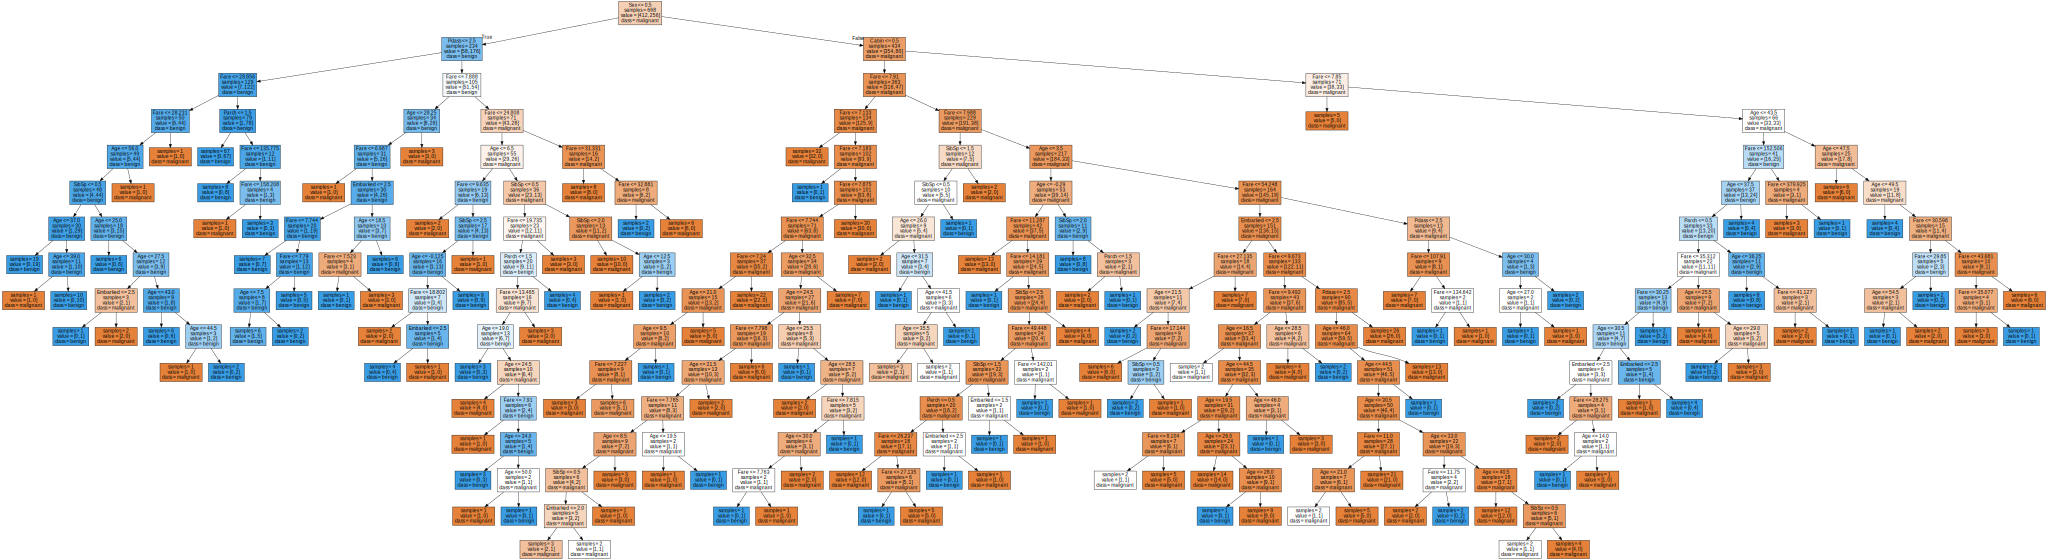

In [ ]:
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=feature_names, impurity=False, filled=True)
import graphviz 
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)

In [ ]:
print("Важности признаков:\n{}".format(clf.feature_importances_)) 

Важности признаков:
[0.07912449 0.04395804 0.3226948  0.2464461  0.0388743  0.01874896
 0.2187148  0.0314385 ]


In [ ]:
for name, score in zip(feature_names, clf.feature_importances_): 
    print(name, score)

Pclass 0.07912449110149374
Cabin 0.04395803836452046
Sex 0.3226947973611657
Age 0.2464461036123862
SibSp 0.038874302379656896
Parch 0.01874896326626166
Fare 0.21871480162790358
Embarked 0.03143850228661185


Text(0, 0.5, 'Признак')

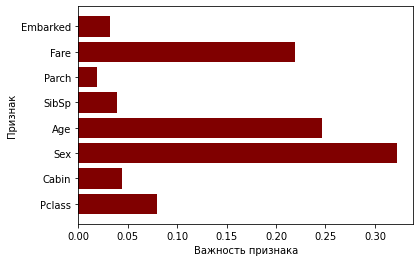

In [ ]:
n_features = {}
for name, score in zip(feature_names, clf.feature_importances_): 
  n_features[name] = score
courses = list(n_features.keys())
values = list(n_features.values())
plt.barh(courses, values, color='maroon')
plt.xlabel("Важность признака") 
plt.ylabel("Признак") 
 


Задание 3

[0.7668161434977578, 0.7668161434977578, 0.7802690582959642, 0.7847533632286996, 0.7982062780269058, 0.7982062780269058, 0.7982062780269058, 0.8071748878923767, 0.7847533632286996, 0.7757847533632287, 0.7668161434977578, 0.757847533632287, 0.7623318385650224, 0.7533632286995515, 0.7488789237668162, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515, 0.7533632286995515]


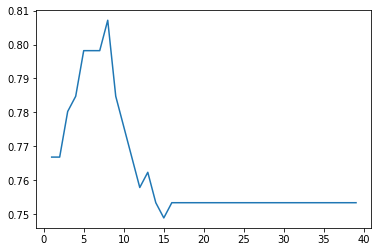

In [ ]:
scores = []
for depth in range(1, 40):
  X_train, X_test, y_train, y_test = train_test_split( 
  X, y, stratify=y, random_state=42) 
  clf = DecisionTreeClassifier(max_depth=depth, random_state=0) 
  clf = clf.fit(X_train, y_train)
  scores.append(clf.score(X_test, y_test))
plt.plot(range(1, 40), scores)
print(scores)

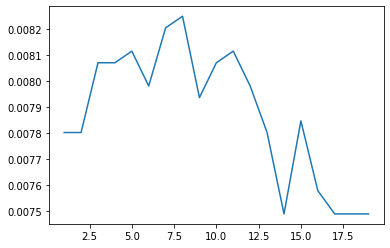

In [ ]:
lital_scores = []
for depth in range(1, 20):
  for i in range(0, 100):
    scores = []
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, stratify=y, random_state=i) 
    clf = DecisionTreeClassifier(max_depth=depth, random_state=i) 
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  lital_scores.append(sum(scores)/100)
plt.plot(range(1, 20), lital_scores)

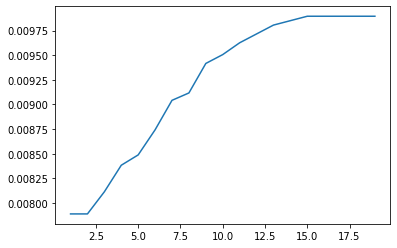

In [ ]:
lital_scores = []
for depth in range(1, 20):
  for i in range(0, 100):
    scores = []
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, stratify=y, random_state=i) 
    clf = DecisionTreeClassifier(max_depth=depth, random_state=i) 
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_train, y_train))
  lital_scores.append(sum(scores)/100)
plt.plot(range(1, 20), lital_scores)

Задание 5


In [ ]:
lital_scores = []
for depth in range(1, 20):
  for i in range(0, 100):
    scores = []
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, stratify=y, random_state=i) 
    clf = DecisionTreeClassifier(max_depth=depth, random_state=i) 
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  lital_scores.append(sum(scores)/100)
plt.plot(range(1, 20), lital_scores)

In [ ]:
# Для import mglearn и для boston
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple
# <Restart runtime>
!pip install mglearn
!pip install --upgrade joblib==1.1.0

from sklearn.datasets import load_boston

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.tree import export_graphviz

boston = load_boston()
X = boston.data
y = boston.target
X_df = pd.DataFrame(X)
X_df


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=i) 
clf = DecisionTreeRegressor(max_depth=10, random_state=0) 
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7621273435419911


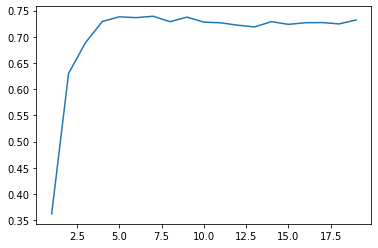

In [ ]:
from matplotlib import pyplot as plt 

lital_scores = []
for depth in range(1, 20):
  scores = []
  for i in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, random_state=i) 
    clf = DecisionTreeRegressor(max_depth=depth, random_state=i) 
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  lital_scores.append(sum(scores)/100)
plt.plot(range(1, 20), lital_scores)